<h3> LAB 9 - Filtragem de Imagens</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
from pylab import *
from scipy.signal import *
import cv2 

<b>Escolha uma imagem qualquer. Pode ser colorida ou monocromática.</b>

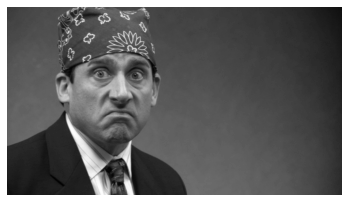

In [2]:
# Importa a imagem em modo monocromático
img = cv2.imread('mike.png',0)
#img = cv2.imread('shuttle_80x60.tif',0)
axis('off')
imshow(img,cmap='gray');

<b>1.a) Filtre 3 vezes a imagem por filtro passa-baixa com diferentes frequências de corte. Mostre a imagem original e as filtradas, lado a lado. </b>

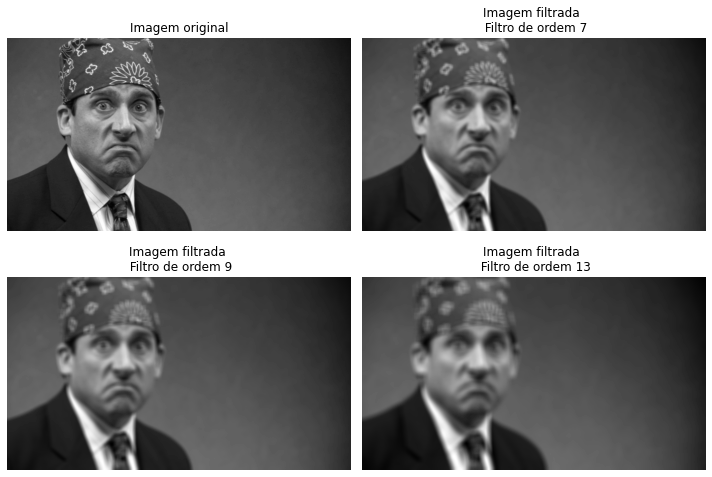

In [7]:
# Filtro normalizado NxN
# Quanto maior o N, mais seletivo o filtro
pad_size = 15
N = [7,9,13]

# Cria uma lista de kerneis
kernel_LP = []

# Plota a imagem original, filtrada e a PSF do filtro
fig, axs = subplots(2,2,figsize=(10,7))
axs = axs.ravel()
axs[0].axis('off')
axs[0].imshow(img ,cmap='gray')
axs[0].set_title('Imagem original')

for i in range(3):
    # Em cada iteração do loop, um novo kernel é adicionado a lista
    kernel_LP.append(zeros((N[i],N[i])))
    
    # Kernel de suavização é criado e aplicado um padding
    kernel_LP[i] = ones((N[i],N[i]),float32)
    #kernel_LP[i] = pad(kernel_LP[i], ((pad_size,pad_size),(pad_size,pad_size)), 'constant')

    # Normaliza o filtro com base em suas dimensões
    kernel_LP[i] = kernel_LP[i]/sum(kernel_LP[i])

    # Aplica o filtro passa-baixa por convolução
    img_LPF = convolve2d(img, kernel_LP[i], boundary='symm', mode="same")
    
    axs[i+1].axis('off')
    axs[i+1].imshow(img_LPF ,cmap='gray')
    axs[i+1].set_title('Imagem filtrada \n Filtro de ordem %i' %N[i])

tight_layout()
show()

<b>1.b) A partir de uma linha da imagem, mostre um gráfico da transformada de Fourier da imagem (linha) original, juntamente com as 3 respostas em frequência do filtro.</b>

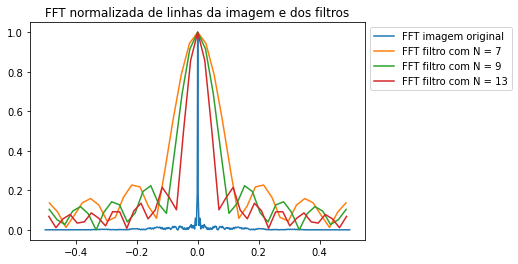

In [4]:
# Cria um vetor com somente a primeira linha de cada imagem
line_img = img[0]

# Aplica a fft e cria vetores para as abscissas se alinharem
line_img_fft = fftshift(fft(line_img))
w_imgs = fftshift(fftfreq(len(line_img)))

# Plota as ffts unidimensionais normalizadas
plot(w_imgs,abs(line_img_fft/max(line_img_fft)))
lh = []
lh.append('FFT imagem original')

for i in range(3):
    # Seleciona uma linha do centro do kernel e aplica a fft
    line_LPF = kernel_LP[i][(int(len(kernel_LP[i])/2))]
    line_LPF_fft = abs(fftshift(fft(line_LPF)))
    w_LPF = fftshift(fftfreq(len(line_LPF_fft)))
    
    # Plota a fft e o cria um handler para o título
    plot(w_LPF,line_LPF_fft/max(line_LPF_fft))
    lh.append('FFT filtro com N = %i' %(N[i]))

legend(lh, loc='upper left', bbox_to_anchor=(1,1))
title('FFT normalizada de linhas da imagem e dos filtros')
show()

<b>2.a) Filtre 3 vezes a imagem por filtro passa-alta com diferentes frequências de corte. Mostre a imagem original e as filtradas, lado a lado.</b>

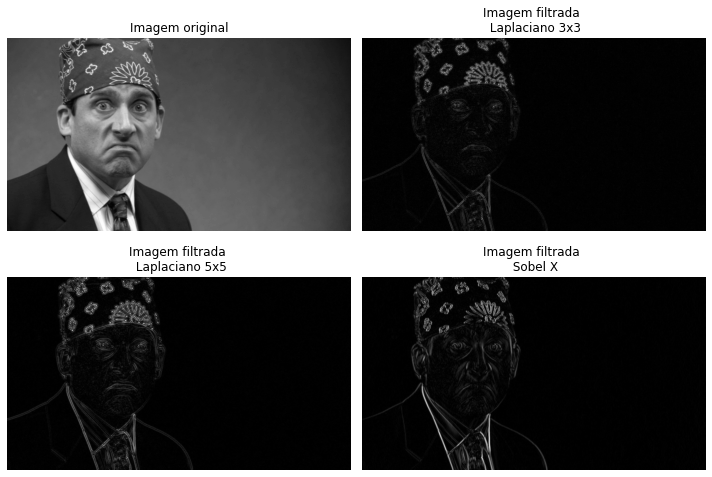

In [5]:
# Cria uma lista de kerneis
kernel_HP = []

# Cria filtro Laplaciano 3x3 e adiciona a lista
kernel_HP.append (array([[-1.0, -1.0, -1.0], 
                         [-1.0, 8.0, -1.0],
                         [-1.0, -1.0, -1.0]]))

# Cria filtro Laplaciano 5x5 e adiciona a lista
kernel_HP.append (array([[-1, -1, -1, -1, -1],
                         [-1,  1,  2,  1, -1],
                         [-1,  2,  4,  2, -1],
                         [-1,  1,  2,  1, -1],
                         [-1, -1, -1, -1, -1]]))

# Cria filtro Sobel e adiciona a lista
# Sobel X - Detecta bordas no sentido horizontal
kernel_HP.append (array([[-1.0, 0.0, 1.0], 
                         [-2.0, 0.0, 2.0],
                         [-1.0, 0.0, 1.0]]))


# Plota a imagem original, filtrada e a PSF do filtro
fig, axs = subplots(2,2,figsize=(10,7))
axs = axs.ravel()
axs[0].axis('off')
axs[0].imshow(img ,cmap='gray')
axs[0].set_title('Imagem original')

titles = ['Laplaciano 3x3', 'Laplaciano 5x5','Sobel X']

for i in range(3):
    
    # Implementa padding nos kerneis
    kernel_HP[i] = pad(kernel_HP[i], ((pad_size,pad_size),(pad_size,pad_size)), 'constant')

    # Aplica o filtro passa-alta por convolução
    img_HPF = convolve2d(img, kernel_HP[i], boundary='symm', mode="same")
    
    axs[i+1].axis('off')
    axs[i+1].imshow(absolute(img_HPF) ,cmap='gray')
    axs[i+1].set_title('Imagem filtrada \n %s' %titles[i])

tight_layout()
show()

<b>2.b) A partir de uma linha da imagem, mostre um gráfico da transformada de Fourier da imagem (linha) original, juntamente com as 3 respostas em frequência do filtro.</b>

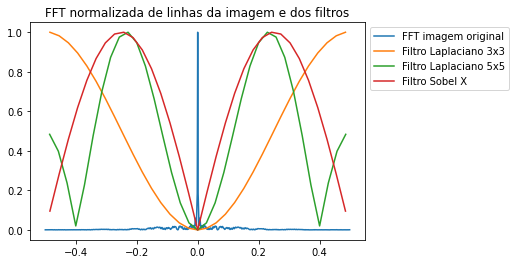

In [6]:
# Limpa a lista de títulos
lh.clear()
lh.append('FFT imagem original')

# Plota as ffts unidimensionais normalizadas
plot(w_imgs,abs(line_img_fft/max(line_img_fft)))

for i in range(3):
    # Aplica a fft do kernel
    HP_fft = abs(fftshift(fft2(kernel_HP[i])))
    
    # Seleciona uma linha central da fft do kernel
    line_HPF_fft = HP_fft[(int(len(kernel_HP[i])/2))]
    w_HPF = fftshift(fftfreq(len(line_HPF_fft)))
    
    # Plota a fft e o cria um handler para o título
    plot(w_HPF,line_HPF_fft/max(line_HPF_fft))
    lh.append(('Filtro %s' %titles[i]))

legend(lh, loc='upper left', bbox_to_anchor=(1,1))
title('FFT normalizada de linhas da imagem e dos filtros')
show()